In [2]:

import numpy as np
import pandas as pd
import pickle
import os

class Bunch(dict):
    def __init__(self, **kwargs):
        super().__init__(kwargs)
        for key, value in kwargs.items():
            setattr(self, key, value)

def _convert_to_numpy_array(dataframes: list[pd.DataFrame], target: pd.Series):
    numpy_data = []
    for df in dataframes:
        numpy_data.append(df.values)
    return np.array(numpy_data), target.to_numpy()

def load_tsa_data(return_X_y=False):

    data_filename = os.path.join('./data', 'tsa_data.pkl')
    with open(data_filename, 'rb') as file:
        data, target = pickle.load(file)  # tuple[list[pd.DataFrame], pd.Series]

    feature_names = data[0].columns.to_list()
    target_names = ['stable', 'unstable']

    data, target = _convert_to_numpy_array(data, target)

    if return_X_y:
        return data, target

    return Bunch(
        data=data,
        target=target,
        feature_names=feature_names,
        target_names=target_names,
        filename=data_filename
    )

# Load the data
bunch = load_tsa_data()
data, target = bunch.data, bunch.target


# Imports


In [3]:
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib

In [4]:
!pip install nbformat

In [5]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import pandas as pd
import matplotlib.pyplot as plt



In [6]:
import time
from sklearn.model_selection import train_test_split
# from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Loading

In [ ]:
import nbformat

# Load the second uploaded notebook
notebook_path_2 = "Parallel CNN-Based"
# Load the second uploaded notebook
with open(notebook_path_2, 'r', encoding='utf-8') as f:
    notebook_2 = nbformat.read(f, as_version=4)

# Extract code cells from the second notebook
code_cells_2 = [cell['source'] for cell in notebook_2.cells if cell.cell_type == 'code']
code_cells_2[:3]  # Show first few code cells to understand the structure


NameError: name 'notebook_path_2' is not defined

In [20]:
bunch = load_tsa_data()
data, target = bunch.data, bunch.target


NameError: name 'load_tsa_data' is not defined


# Scaling Test

In [10]:
# Flatten 3D time series into 2D feature vectors
data = data.reshape(data.shape[0], -1)


Data Fraction: 0.10, Train Size: 1028, Time: 1.81s, Accuracy: 0.9109
Data Fraction: 0.25, Train Size: 2570, Time: 4.46s, Accuracy: 0.9603
Data Fraction: 0.50, Train Size: 5140, Time: 8.32s, Accuracy: 0.9829
Data Fraction: 0.75, Train Size: 7710, Time: 12.57s, Accuracy: 0.9806
Data Fraction: 1.00, Train Size: 10281, Time: 13.96s, Accuracy: 0.9638


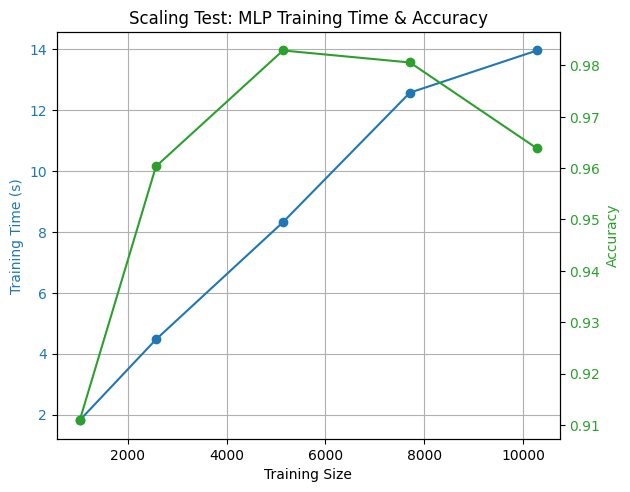

,Fraction,Train Size,Time (s),Accuracy
0,0.10,1028,1.812485,0.910930
1,0.25,2570,4.464325,0.960327
2,0.50,5140,8.316649,0.982886
3,0.75,7710,12.571958,0.980552
4,1.00,10281,13.957143,0.963827


In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import time

# Scaling Test (Data Size Only)

import matplotlib.pyplot as plt

# Assuming `data` and `target` are already defined in the notebook
# If not, you need to define them based on your dataset
# Example: data, target = some_data_loading_function()

# Split data once to reuse the same test set
X_train_full, X_test, y_train_full, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

fractions = [0.1, 0.25, 0.5, 0.75, 1.0]
results = []

for frac in fractions:
    size = int(len(X_train_full) * frac)
    X_train = X_train_full[:size]
    y_train = y_train_full[:size]

    clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, random_state=42)

    start_time = time.time()
    clf.fit(X_train, y_train)
    duration = time.time() - start_time

    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    results.append((frac, size, duration, acc))
    print(f"Data Fraction: {frac:.2f}, Train Size: {size}, Time: {duration:.2f}s, Accuracy: {acc:.4f}")

# Results
df_results = pd.DataFrame(results, columns=["Fraction", "Train Size", "Time (s)", "Accuracy"])

# Plot
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Training Size')
ax1.set_ylabel('Training Time (s)', color=color)
ax1.plot(df_results["Train Size"], df_results["Time (s)"], marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(df_results["Train Size"], df_results["Accuracy"], marker='o', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("Scaling Test: MLP Training Time & Accuracy")
plt.show()

df_results


In [12]:
# Display results as DataFrame
df_results = pd.DataFrame(results, columns=["Fraction", "Train Size", "Time (s)", "Accuracy"])
print(df_results)


   Fraction  Train Size   Time (s)  Accuracy
0      0.10        1028   1.812485  0.910930
1      0.25        2570   4.464325  0.960327
2      0.50        5140   8.316649  0.982886
3      0.75        7710  12.571958  0.980552
4      1.00       10281  13.957143  0.963827


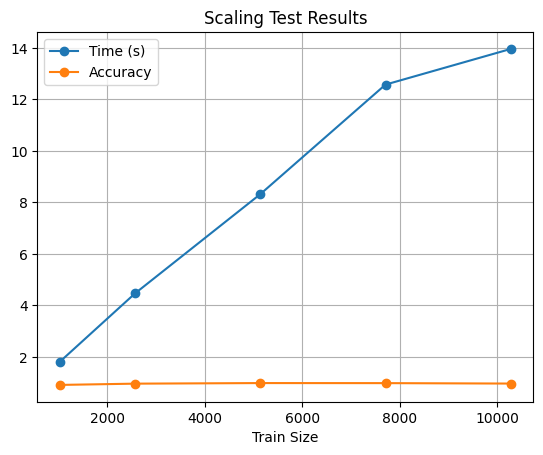

In [13]:
# Plot
df_results.plot(x="Train Size", y=["Time (s)", "Accuracy"], marker='o', title="Scaling Test Results")
plt.grid(True)
plt.show()
